In [1]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from matplotlib.text import Text
import matplotlib.tri as tri

from utils import (
    load_poisson2d_kernel_dataset, load_helmholtz2d_kernel_dataset,
    load_poisson2dhdomain_kernel_dataset, load_helmholtz2dhdomain_kernel_dataset,
    load_cos2d_kernel_dataset, load_cos2dhdomain_kernel_dataset)
from utils import relative_err

In [2]:
nTrain = 1000
nTest = 500

In [88]:
def load_data(task, n):
        print(task)
        if task == 'poisson':
            fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2d_kernel_dataset(
                '../data', nTrain, nTest)
            mesh_path = os.path.join('../data/mesh2D_disk.mat')
        elif task == 'poisson_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_poisson2dhdomain_kernel_dataset(
                '../data', nTrain, nTest)
            mesh_path = os.path.join('../data/mesh2D_h.mat')
        elif task == 'helmholtz':
            fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2d_kernel_dataset(
                '../data', nTrain, nTest)
            mesh_path = os.path.join('../data/mesh2D_disk.mat')
        elif task == 'helmholtz_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_helmholtz2dhdomain_kernel_dataset(
                '../data', nTrain, nTest)
            mesh_path = os.path.join('../data/mesh2D_h.mat')
        elif task == 'cos':
            fTrain, fTest, uTrain, uTest, X, Gref = load_cos2d_kernel_dataset(
                '../data', nTrain, nTest, n=4)
            mesh_path = os.path.join('../data/mesh2D_disk.mat')
        elif task == 'cos_h':
            fTrain, fTest, uTrain, uTest, X, Gref = load_cos2dhdomain_kernel_dataset(
                '../data', nTrain, nTest, n=4)
            mesh_path = os.path.join('../data/mesh2D_h.mat')
        xs = scipy.io.loadmat(mesh_path)['X']
        tris = scipy.io.loadmat(mesh_path)['Tri']
                
        rl2s = []
        if task == 'poisson':
            upredpath = f'../results/poisson2D/ogapw-{n}-1000-relu/upred.npy'
        elif task == 'poisson_h':
            upredpath = f'../results/poisson2Dhdomain/ogapw-{n}-1000-relu/upred.npy'
        elif task == 'helmholtz':
            upredpath = f'../results/helmholtz2D/ogapw-{n}-1000-relu/upred.npy'
        elif task == 'helmholtz_h':
            upredpath = f'../results/helmholtz2Dhdomain/ogapw-{n}-1000-relu/upred.npy'
        elif task == 'cos':
            upredpath = f'../results/cos2D4pi/ogapw-{n}-1000-relu/upred.npy'
        elif task == 'cos_h':
            upredpath = f'../results/cos2D4pihdomain/ogapw-{n}-1000-relu/upred.npy'

        upred = np.load(upredpath, allow_pickle=True)
        
        return upred, uTest, xs, tris

In [89]:
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator

In [90]:
upred, uTest, X, tris = load_data('cos', 512)
triang = tri.Triangulation(X[:,0],X[:,1],triangles=tris)
N = np.arange(X.shape[0])
Ns = np.random.choice(N, size=int(0.8 * X.shape[0]))
Ups = upred[Ns]
Xs = X[Ns]

cos


In [93]:
uref = uTest[:,[0]]
vmin = uref.min()
vmax = uref.max()

uinterp = []
for i in range(upred.shape[1]):
    linearInterp = LinearNDInterpolator(Xs, Ups[:,i])
    UpInterp = linearInterp(X[:,0], X[:,1])
    uinterp.append(UpInterp)
uinterp = np.array(uinterp)
# print(relative_err(uinterp.T, uTest))
# print(relative_err(upred, uTest))

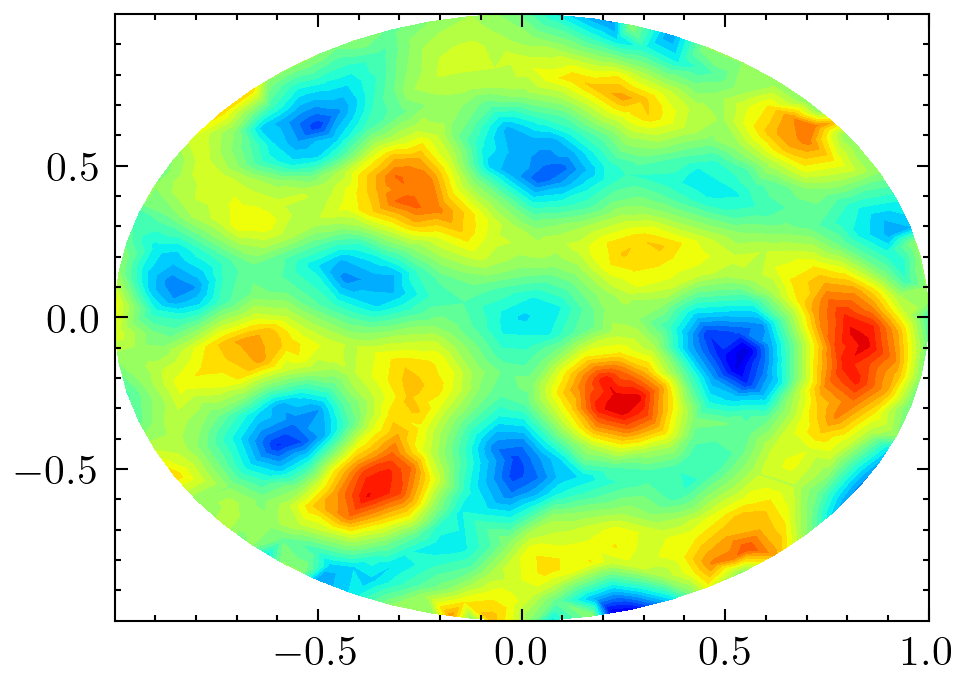

In [92]:
f, ax = plt.subplots()
ax.tricontourf(
        triang, UpInterp, levels=np.linspace(vmin, vmax, 30), cmap='jet')